<h1 style="font-size: 3rem; color: 	#00008b; font-family: 'Times New Roman'; font-weight: bold;">
 EDA And Feature Engineering Of Google Play Store Dataset</h1>



## 1. Problem statement.

Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc

# 2. Data Collection

Dataset source - https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv
The Data consists of 10841 Rows and 13 Columns 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Observation:

Dataset contains missing value mostly present in Rating feature.

In [8]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [9]:
df_copy = df.copy()

In [10]:
## Find non-numeric data
df_copy[~df_copy["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df_copy.drop(df_copy.index[10472], inplace = True) ## dropping row that contain 3.0M 

In [12]:
df_copy[~df_copy["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [13]:
## convert to int
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [15]:
#Check Duplicate values
df_copy[df_copy.duplicated('App')] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


1181 Rows contains Duplicated value so we need to drop this.

In [16]:
df_copy = df_copy.drop_duplicates(subset =["App"],keep="first")

In [17]:
df_copy.shape

(9659, 13)

In [18]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [19]:
df_copy["Last Updated"] = pd.to_datetime(df_copy["Last Updated"])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year
df_copy.drop("Last Updated",axis=1,inplace = True)

In [20]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [21]:
df_copy["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [22]:
size = df_copy["Size"]

In [23]:
## replace M , K and Varies with device 
#changing dtype to float
new_size=[]
for i in size:
    if i.endswith("M"):
        i = i[:-1]
        i = float(i)*1000 ## converting into kb
        new_size.append(i)
        
    elif i.endswith("k"):
        i = i.replace("k","")
        i=float(i)
        new_size.append(i)
    else:
        i=="Varies with device"
        i=i.replace("Varies with device",str(np.nan))
        i = float(i)
        new_size.append(i)

In [24]:
df_copy["Size"] = pd.DataFrame(new_size)

In [25]:
df_copy["Size"]

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10836        NaN
10837        NaN
10838        NaN
10839        NaN
10840        NaN
Name: Size, Length: 9659, dtype: float64

In [26]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [27]:
df_copy["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [28]:
df_copy["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [29]:
# replace special characters present in column Installs and Price
chars_to_remove = ["$","+",","]
cols_to_clean= ["Installs","Price"]
for i in chars_to_remove:
    for j in cols_to_clean:
        df_copy[j]= df_copy[j].str.replace(i,"")
        

In [30]:
# convert dtype to int and float
df_copy["Price"] = df_copy["Price"].astype(float)
df_copy["Installs"] = df_copy["Installs"].astype(int)

### Now Let’s move on to using some data visualization techniques to examine the data.

In [31]:
df_copy["Type"].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

<Axes: >

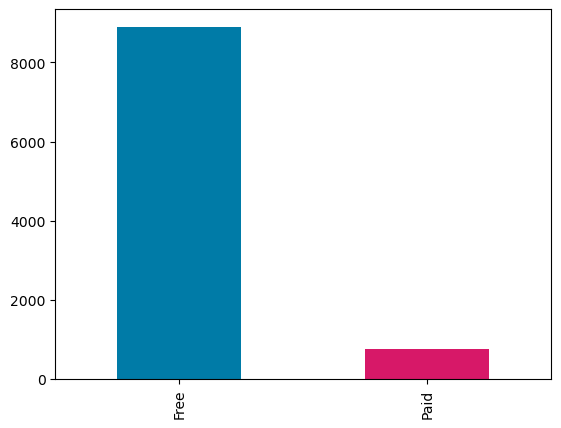

In [32]:
df_copy["Type"].value_counts().plot(kind = "bar",color =["#007ba7","#d71868"])

# Observations:

There are approx 90% Free apps and 10% Paid apps

<Axes: >

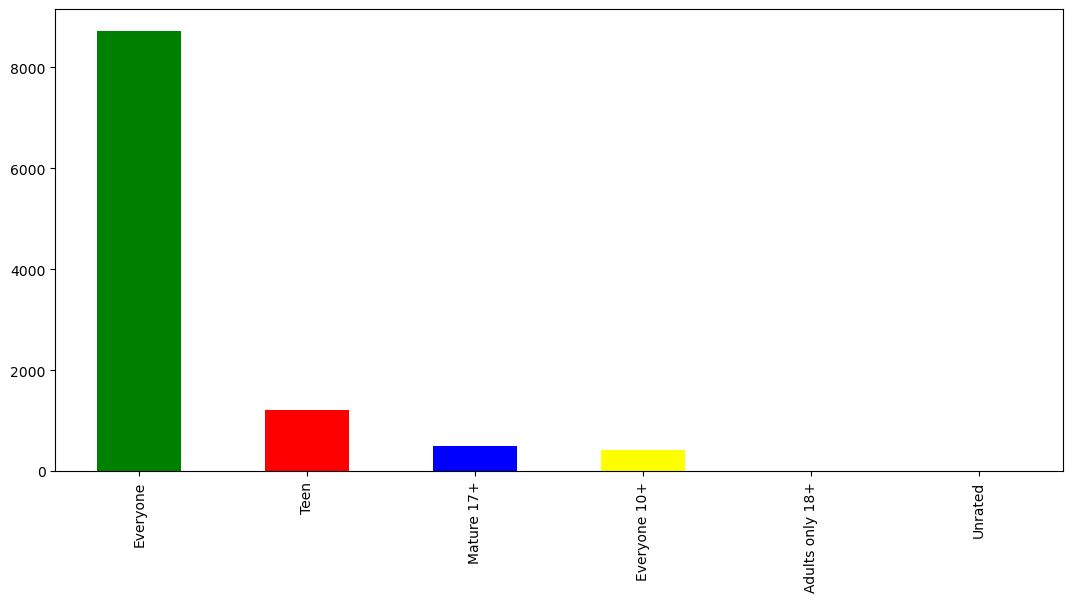

In [33]:
plt.figure(figsize = (13,6))
df["Content Rating"].value_counts().plot(kind="bar",color =["green","red","blue","yellow"])

# Observation 

The content rating of Google Play Store apps is mostly Everyone. Fewer apps have ratings like Teen or Mature 17+. This may mean that app developers want to reach a wider audience.

In [34]:
numerical_features = [x for x in df_copy.columns if df_copy[x].dtype!='O']

In [35]:
numerical_features = numerical_features[:4]

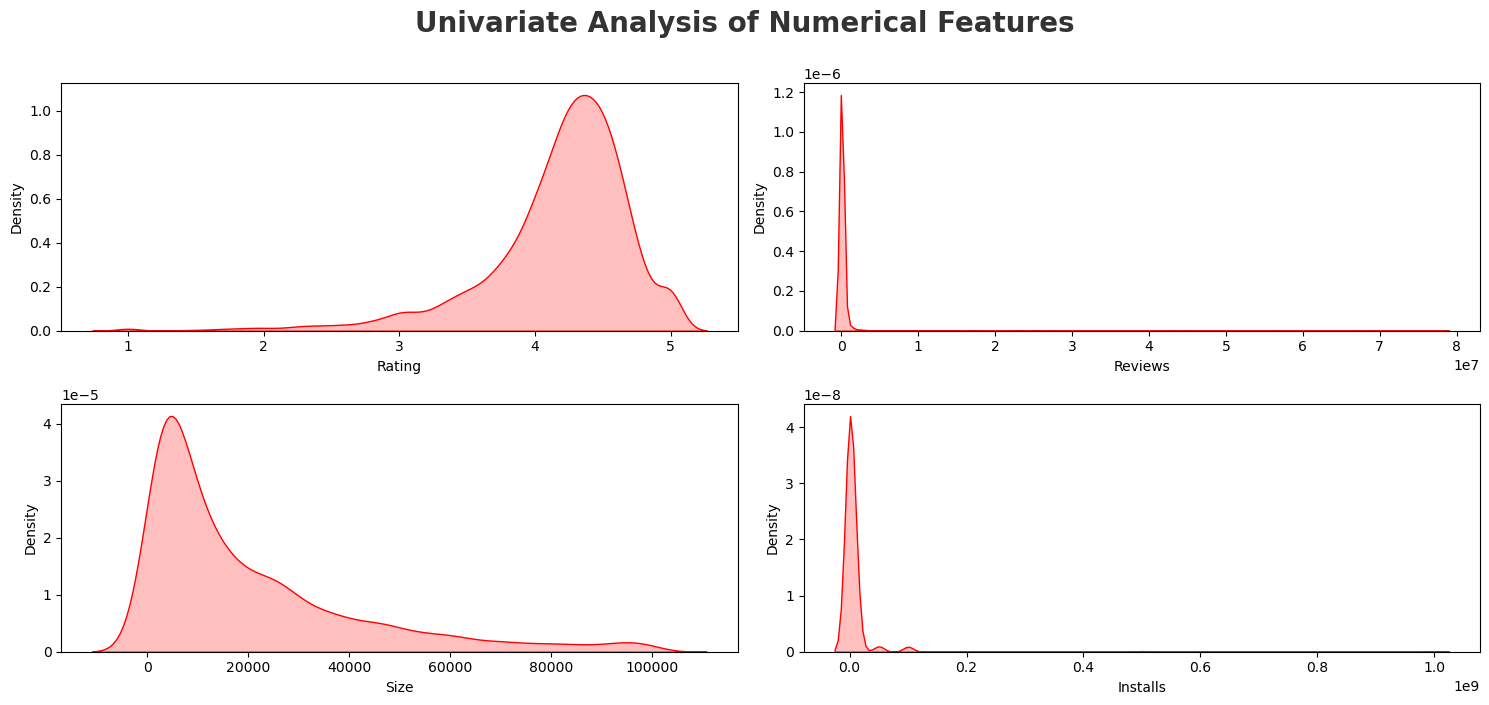

In [36]:
plt.figure(figsize=(15, 7))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_copy[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

# Observation

- Reviews , Size,Installs are right skewed.
- The ratings is left skewed, meaning that most apps have high ratings.
- Most of the apps have ratings between 4.0 to 4.5

In [37]:
category = pd.DataFrame(df_copy["Category"].value_counts())

In [38]:
category[:10]

,Category
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


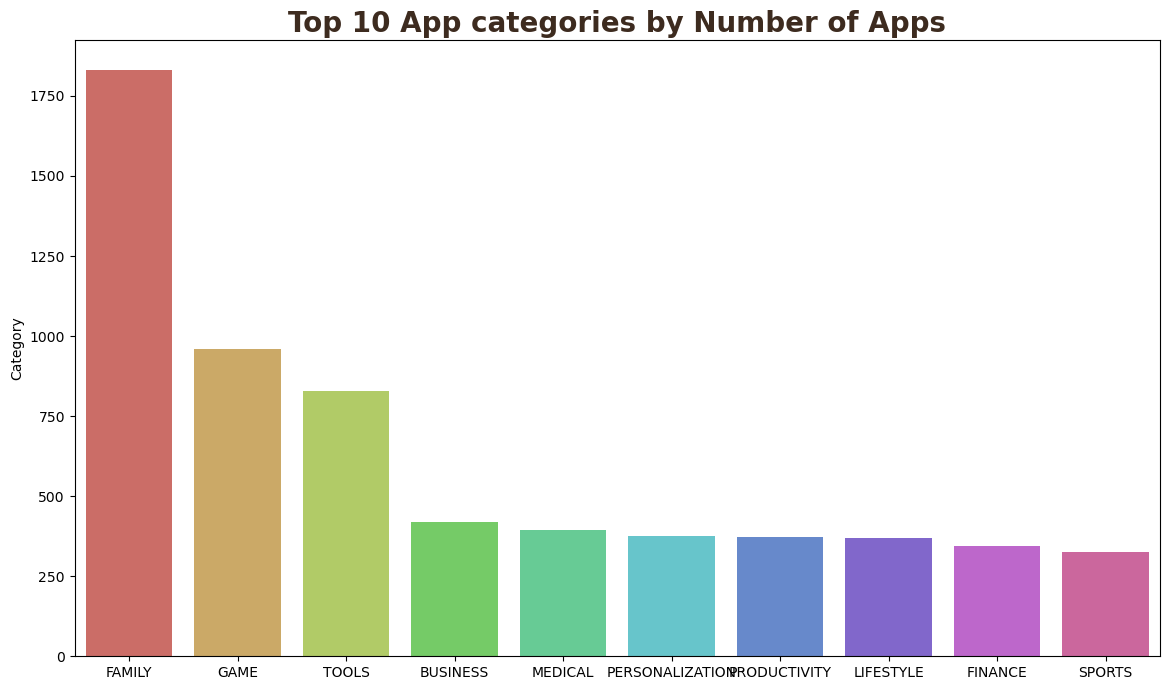

In [39]:
plt.figure(figsize=(14,8))
sns.barplot(x=category.index[:10], y ='Category',data = category[:10],palette='hls')
plt.title('Top 10 App categories by Number of Apps',fontdict={"fontsize": 20,'fontweight': 'bold','color':"#3d2b1f"});
plt.grid(False)

# observation

- The Family category has the most apps in the Google Play Store. The Game and Tools categories are also popular.This shows the trends and preferences of app developers and users. 


In [40]:
cat_inst = df_copy.groupby(["Category"])["Installs"].sum().sort_values(ascending = False)
cat_inst = pd.DataFrame(cat_inst/1000000000).reset_index()## converting it into billions

In [41]:
cat_inst[:2]

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276


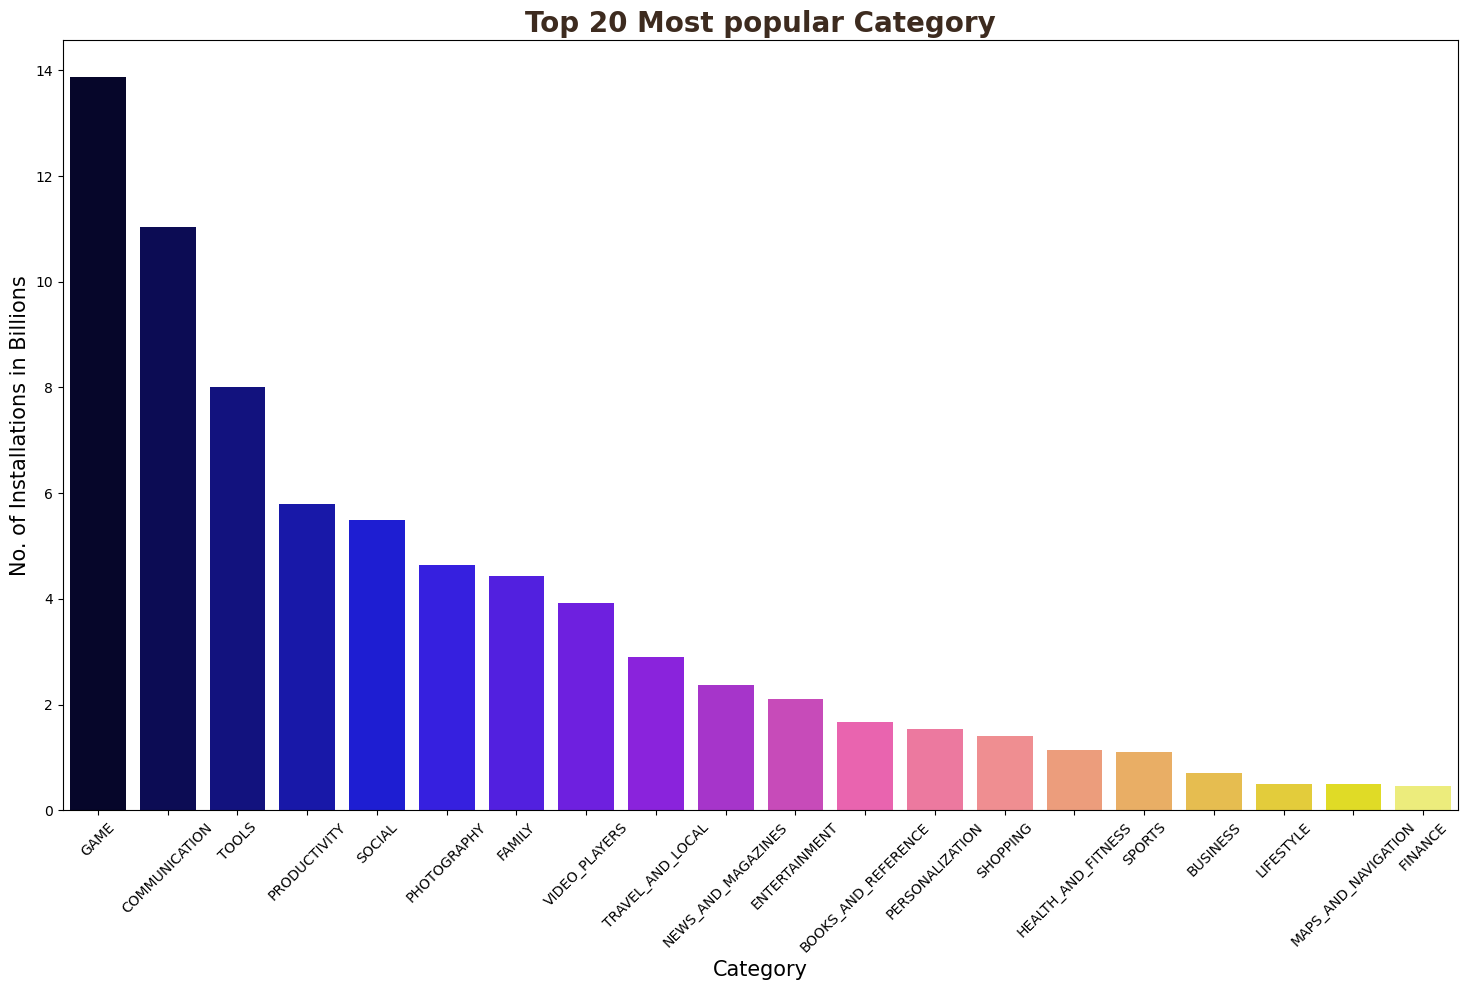

In [42]:
plt.figure(figsize=(18,10))
plt.title("Top 20 Most popular Category",fontdict={"fontsize": 20,'fontweight': 'bold','color':"#3d2b1f"})
sns.barplot(x= cat_inst["Category"][:20], y= cat_inst["Installs"][:20], palette ="gnuplot2")
plt.xlabel('Category', fontdict={'fontsize': 15})
plt.ylabel('No. of Installations in Billions', fontdict={'fontsize': 15});
plt.grid(False)
plt.xticks(rotation = 45);


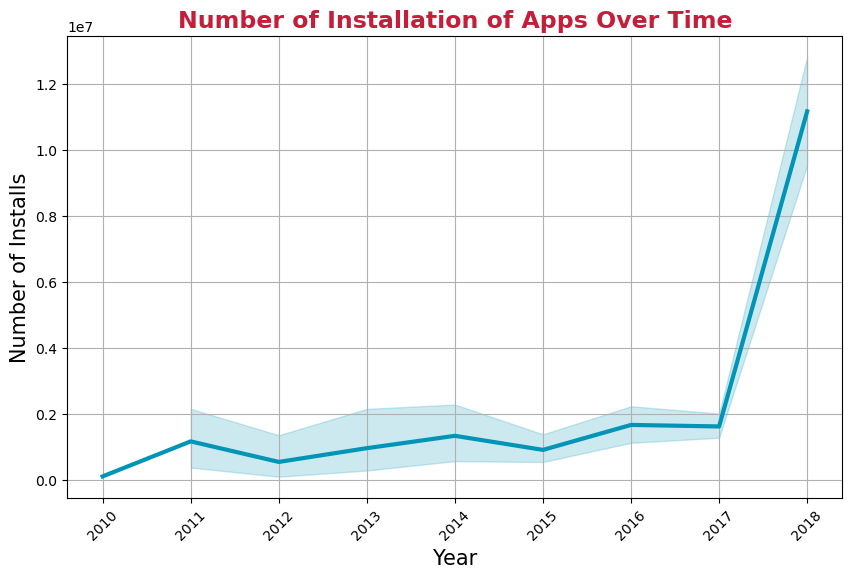

In [43]:
plt.figure(figsize = (10,6))
plt.title('Number of Installation of Apps Over Time', fontdict={'fontsize': 17, 'fontweight': 'bold' ,"color":"#c41e3a"})
sns.lineplot(data = df_copy , x = "Year",y = "Installs",linewidth =3,color = "#0095b6")
plt.grid(True)
plt.xlabel('Year', fontdict={'fontsize': 15})
plt.ylabel('Number of Installs', fontdict={'fontsize': 15})
plt.xticks(np.arange(2010, 2019, 1), rotation=45);

# Observation 

- The app’s installs grew a lot over time. It had steady growth from 2010 to 2016, with a small drop in 2014. It had a huge jump in 2017 and 2018, reaching over 20 million installs. This means the app became very popular and in demand, maybe because of better features, reviews, marketing, or referrals

In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int32  
 4   Size            7494 non-null   float64
 5   Installs        9659 non-null   int32  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  Day             9659 non-null   int64  
 13  Month           9659 non-null   int64  
 14  Year            9659 non-null   int64  
dtypes: float64(3), int32(2), int64(3), object(7)
memory usage: 1.1+ MB


In [45]:
cat_rev = pd.DataFrame(df_copy.groupby(["Category"])["Reviews"].sum().sort_values(ascending = False))
cat_rev['Reviews'] = cat_rev["Reviews"]/1000000 # convert it into millions

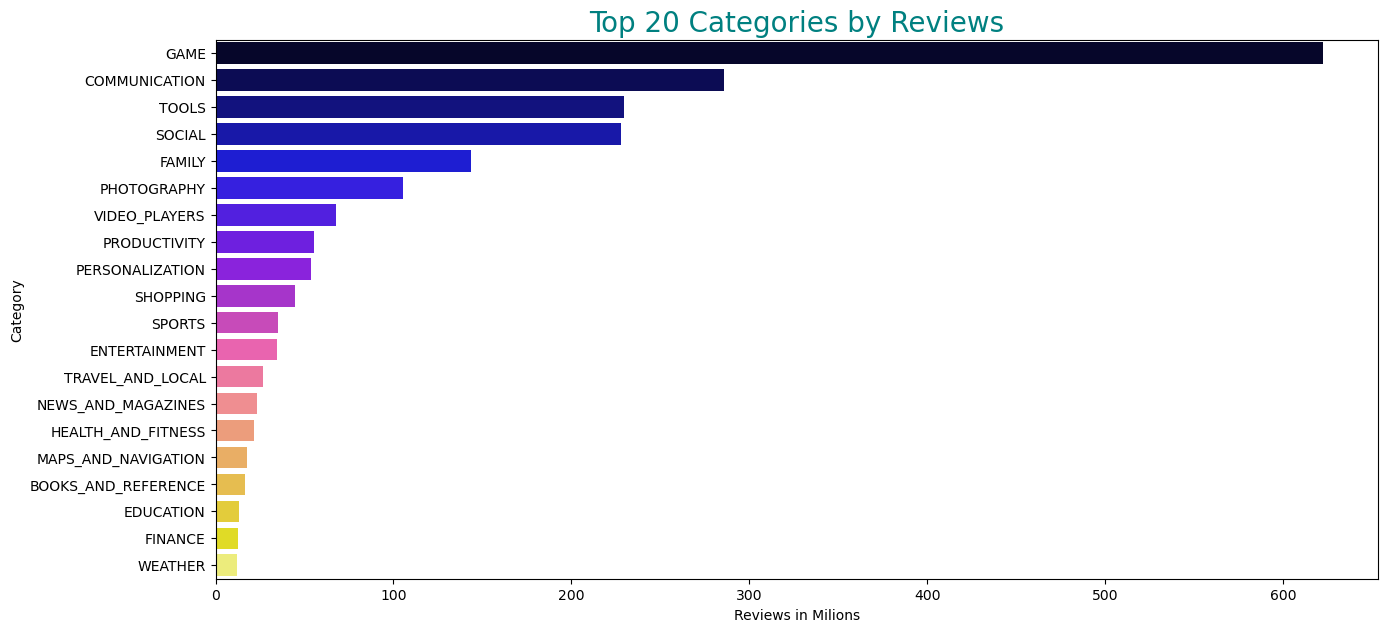

In [46]:
plt.figure(figsize=(15,7))
sns.barplot( y = cat_rev.index[:20] , x = cat_rev["Reviews"][:20],palette ="gnuplot2")
plt.title("Top 20 Categories by Reviews",fontdict={"fontsize" : 20,"color":"teal"})
plt.xlabel("Reviews in Milions");


<Axes: title={'center': 'Top 20 largest Apps in Size'}, xlabel='Size', ylabel='App'>

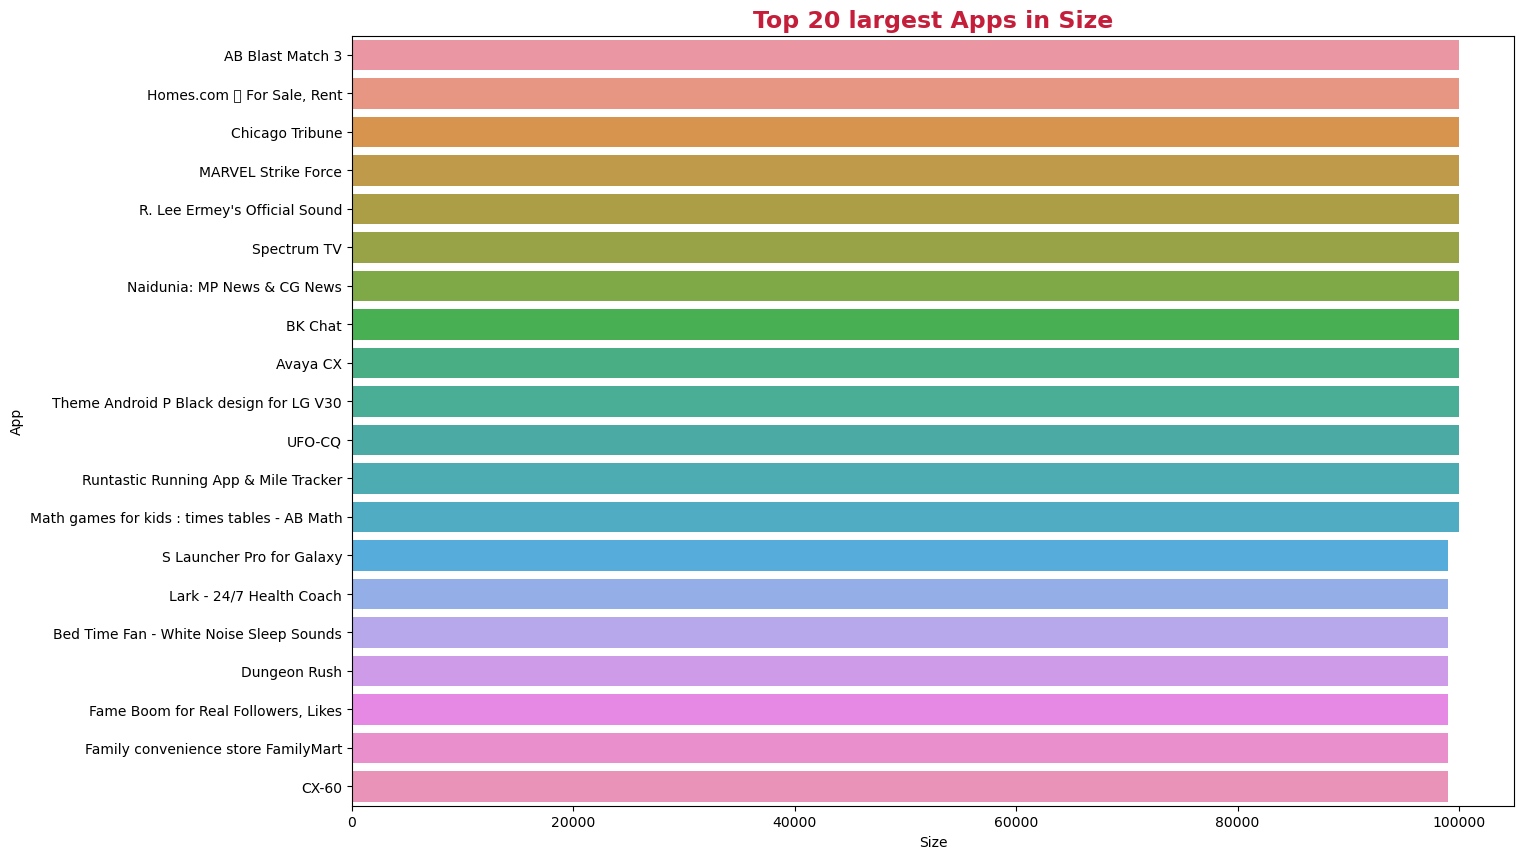

In [47]:
sorted_df = df_copy.sort_values(by ="Size",ascending = False)
plt.figure(figsize=(15,10))
plt.title('Top 20 largest Apps in Size', fontdict={'fontsize': 17, 'fontweight': 'bold' ,"color":"#c41e3a"})
sns.barplot(data = sorted_df[:20],y="App",x="Size")

<Axes: >

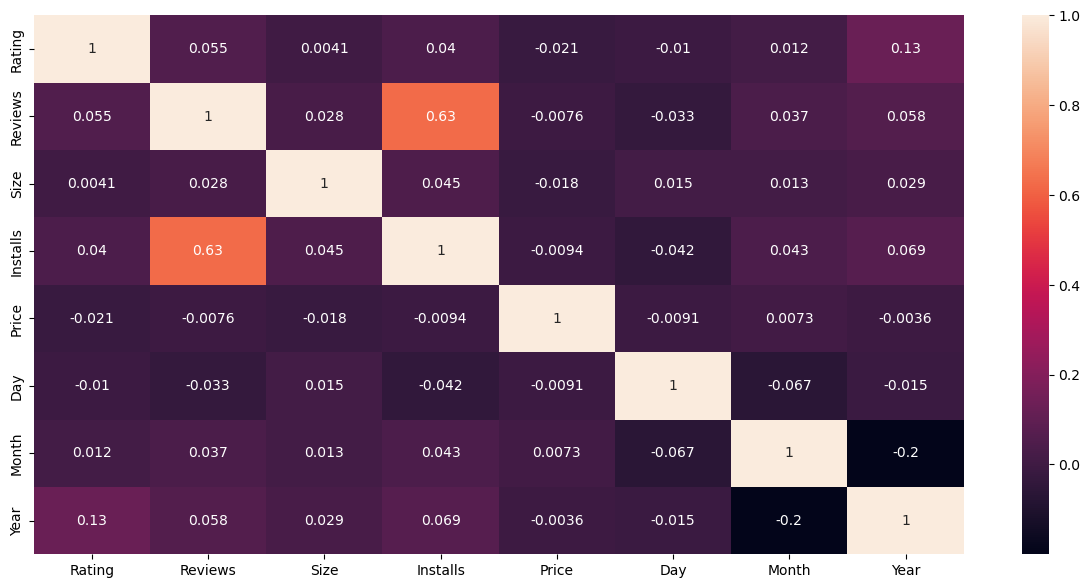

In [48]:
plt.figure(figsize=(15,7))
sns.heatmap(df_copy.corr(), annot = True)

In [49]:
app_price = pd.DataFrame(df_copy.groupby(["Category"])["Price"].mean().sort_values(ascending = False))
app_price.head()

,Price
Category,
FINANCE,8.408203
LIFESTYLE,6.398022
MEDICAL,2.520759
EVENTS,1.718594
FAMILY,1.309967


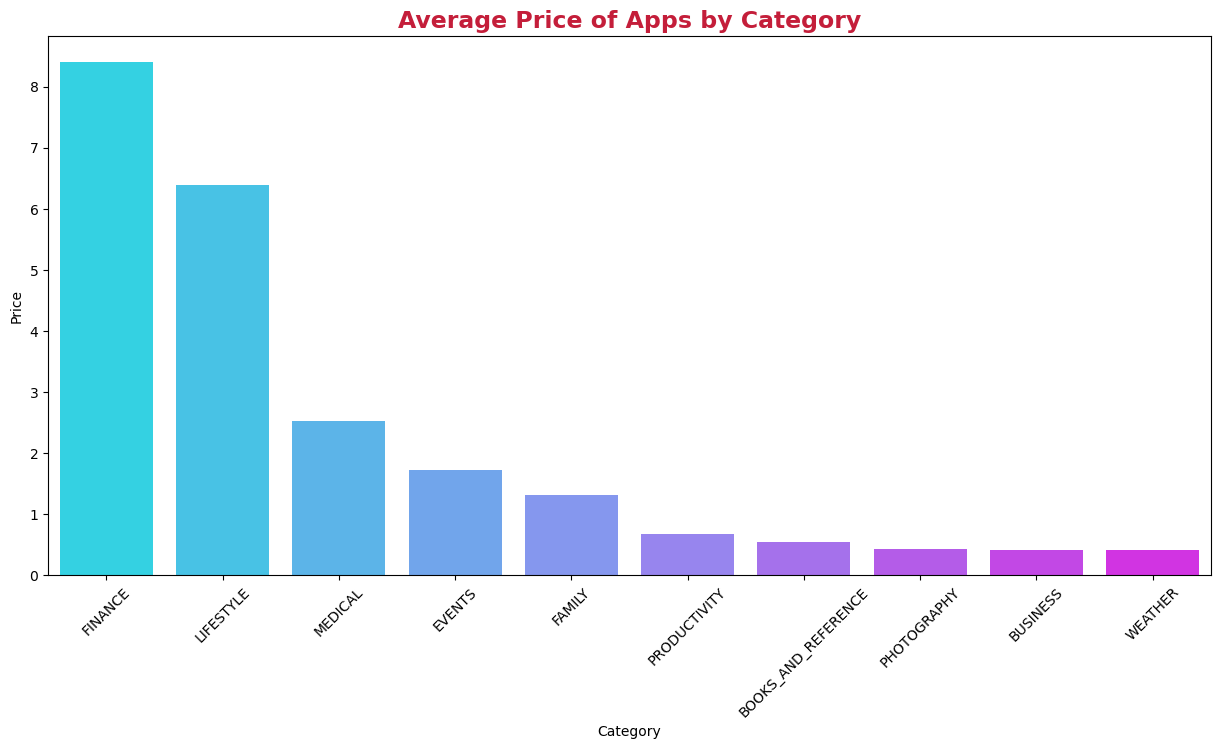

In [50]:
plt.figure(figsize=(15,7))
plt.title('Average Price of Apps by Category', fontdict={'fontsize': 17, 'fontweight': 'bold' ,"color":"#c41e3a"})
sns.barplot(x =app_price.index[:10] , y= app_price["Price"][:10], palette = "cool")
plt.xticks(rotation=45);

<font size="8" color ="#00416a" face="Times new roman" > Final Conclusion </font>

- The majority of the apps are free, which suggests that app developers rely on other sources of revenue, such as advertising or in-app purchases.

- The content rating of the apps is mostly Everyone, which indicates that app developers aim to reach a wide and diverse audience.

- The ratings of the apps are generally high, with most of them between 4.0 and 4.5, which implies that users are satisfied with the quality and functionality of the apps.

- The Family category has the most apps in the Google Play Store, followed by the Game and Tools categories, which reflects the preferences and needs of app developers and users.

- The app installs have increased significantly over time, especially in 2017 and 2018, which shows that the demand and popularity of apps have grown rapidly in recent years.

- The finance, lifestyle, and medical categories have higher prices than other categories, which suggests that these apps offer more specialized or premium features or services.

